<a href="https://colab.research.google.com/github/Alex-adim/colab-notebooks/blob/master/Intro_to_Pandas_and_basic_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Very simple example of how to work with data frames in Pandas and training a simple model
#For more on Pandas read https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

#Alex's tutorial on tuning regression models 
https://nbviewer.jupyter.org/url/users.ece.utexas.edu/~dimakis/DataScience/intro-to-kaggle.ipynb

#Useful tutorial for missing data (On Kaggle titanic) 
https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data

# Introduction to feature exploration and tuning 
https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

import pandas as pd
import numpy as np
import matplotlib

In [0]:
#lets warm up with data frames in pandas 
df = pd.DataFrame([[0.8, 'Sugar', 0.8, 1],
                   [0.3, 'Aspartame', 0.25, 0],
                   [0.2, 'Sugar', 0.8, 0],
                   [0.3, 'Surcalose', 0.7, 1],
                   [0.9, 'Sugar',0.7, 1 ]],
                  columns=['Acidity','SwtUsed','Sweetness','FocusGroupScore'])

In [24]:
df

,Acidity,SwtUsed,Sweetness,FocusGroupScore
0,0.8,Sugar,0.80,1
1,0.3,Aspartame,0.25,0
2,0.2,Sugar,0.80,0
3,0.3,Surcalose,0.70,1
4,0.9,Sugar,0.70,1


In [25]:
df.Acidity

0    0.8
1    0.3
2    0.2
3    0.3
4    0.9
Name: Acidity, dtype: float64

In [0]:
#Slicing and dicing. We want to run simple models on this so we should separate the training data from the y column
X_train= df.loc[:,'Acidity':'Sweetness']
y= df.loc[:,'FocusGroupScore']

In [0]:
X_train=pd.get_dummies(X_train)

In [28]:
X_train

,Acidity,Sweetness,SwtUsed_Aspartame,SwtUsed_Sugar,SwtUsed_Surcalose
0,0.8,0.80,0,1,0
1,0.3,0.25,1,0,0
2,0.2,0.80,0,1,0
3,0.3,0.70,0,0,1
4,0.9,0.70,0,1,0


In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y)

[Text(200.88000000000002, 181.2, 'X[0] <= 0.55\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = f'),
 Text(133.92000000000002, 108.72, 'X[4] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = t'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = t'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = f'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = f')]

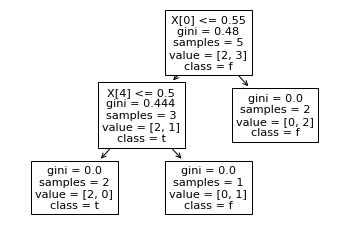

In [30]:
tree.plot_tree(clf,class_names='tf')

In [32]:
clf.predict(X_train.loc[:,:])

array([1, 0, 0, 1, 1])

In [33]:
clf.get_depth()

2

In [0]:
#Finally, lets see how we fill in missing data using pd.fillna  

In [0]:
#nans in Pandas 
df2 = pd.DataFrame([[np.nan, 'Sugar', 0.2, 1],
                   [0.3, 'Sugar', np.nan, 0],
                   [0.2, 'Sugar', np.nan, 0],
                   [0.3, 'Aspartame', 0.7, 1],
                   [0.9, 'Sugar',0.7, 1 ]],
                  columns=['Acidity','SwtUsed','Sweetness','FocusGroupScore'])

In [51]:
df2

,Acidity,SwtUsed,Sweetness,FocusGroupScore
0,NaN,Sugar,0.2,1
1,0.3,Sugar,NaN,0
2,0.2,Sugar,NaN,0
3,0.3,Aspartame,0.7,1
4,0.9,Sugar,0.7,1


In [47]:
df2.fillna(df.mean())

,Acidity,SwtUsed,Sweetness,FocusGroupScore
0,0.5,Sugar,0.20,1
1,0.3,Sugar,0.65,0
2,0.2,Sugar,0.65,0
3,0.3,Aspartame,0.70,1
4,0.9,Sugar,0.70,1


In [0]:
X_train=pd.get_dummies(df2) 

In [44]:
X_train

,Acidity,Sweetness,FocusGroupScore,SwtUsed_5,SwtUsed_Sugar
0,NaN,0.2,1,0,1
1,0.3,NaN,0,0,1
2,0.2,NaN,0,0,1
3,0.3,0.7,1,1,0
4,0.9,0.7,1,0,1
